# Assignment - Florian Sonderegger

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from multiprocessing import cpu_count
import seaborn as sns
from sklearn import metrics

# Setting the figure size in this notebook
plt.rcParams['figure.figsize'] = [10, 7]

In [ ]:
# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train, x_test = x_train/255, x_test/255
print('Shape of x_train:', x_train.shape, '\n', 'Shape of x_test:', x_test.shape)
input_shape=x_train.shape[1:]

Shape of x_train: (60000, 28, 28, 1) 
 Shape of x_test: (10000, 28, 28, 1)


In a first step I load the data and make sure all pixel values between 0 and 1. Large feature values might disrupt or slow down the the neural network.

In [ ]:
# Set up CNN Architecture

model = Sequential()
model.add(Conv2D(32,kernel_size=5,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

I chose to use a convolutional neural network (CNN) because this is a well known dataset and CNN's are known to work well for image classification and they are easy to implement using the keras API for Tensorflow.

The fist step is the convolution. Convolution is basically appling filters with learned weights to extract features from the image. We use 32 filters with a size of 5x5. After the convolution the Relu activation function is applied the first time in order to introduce non-linearity. The next layer is a pooling layer. Max pooling is used to reduce the feature space by looking at a 2x2 window of the original matrix and only using the maximum of the four values thereby reducing the size of the feature space by a factor of four. Flatten is used to transform the feature space to a vector with one dimesion as it is used for the fully connected layer. We use 128 neurons and again apply the relu activation function for nonlinearity. The dropout layer removes each of the 128 neurons with probability 0.2. This is one way of regularization for neural networks. A dropout layer can help to decrease the importance of a single neuron and thereby decrease the danger of overfitting. The last layer has the same amount of neurons as there are classes. Softmax is a way of converting the values in the last layer to probabilities.

In [ ]:
# Training the CNN

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
n_workers=cpu_count()
print('There are {} cores available'.format(n_workers))
model.fit(x=x_train,y=y_train, batch_size=512, epochs=15, 
    verbose=1, callbacks=None, validation_data=(x_test, y_test), 
    shuffle=True, class_weight=None, max_queue_size=10, 
    workers=n_workers, use_multiprocessing=True)

There are 2 cores available
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 26s 436us/step - loss: 0.4137 - acc: 0.8817 - val_loss: 0.1177 - val_acc: 0.9653
Epoch 2/15
60000/60000 [==============================] - 25s 424us/step - loss: 0.1060 - acc: 0.9696 - val_loss: 0.0643 - val_acc: 0.9795
Epoch 3/15
60000/60000 [==============================] - 25s 423us/step - loss: 0.0687 - acc: 0.9797 - val_loss: 0.0494 - val_acc: 0.9839
Epoch 4/15
60000/60000 [==============================] - 25s 423us/step - loss: 0.0550 - acc: 0.9837 - val_loss: 0.0431 - val_acc: 0.9854
Epoch 5/15
60000/60000 [==============================] - 25s 422us/step - loss: 0.0444 - acc: 0.9868 - val_loss: 0.0441 - val_acc: 0.9853
Epoch 6/15
60000/60000 [==============================] - 25s 423us/step - loss: 0.0377 - acc: 0.9888 - val_loss: 0.0361 - val_acc: 0.9877
Epoch 7/15
60000/60000 [==============================] - 25s 424us/step - loss: 0.0330 

I used the Adam the default optimizer which tends to work well without tuning its hyperparameters. Because the the classes are integer values and they are mutually exclusive I use the sparse categorical crossentropy as a loss function.

The metric I used is accuracy. With this CNN we can reach an accuracy of over 99% in just 15 Epochs which I think is an excellent score considering the misclassified cases would not be easy to classify even for a human. 

The metric to use really depends on the dataset and the target one has in mind. The problem with accuracy and an unbalanced dataset is we can recieve a high accuracy by always predicting the majority class. In order to solve this one can look at Precision and Recall for each class. The Recall for a minority class would be low if we never predict it. We can also look at the confusion matrix to get an idea what is happening.

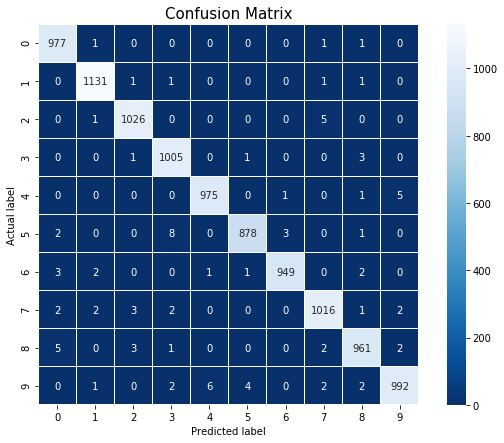

In [ ]:
# Let us look at the confusion matrix
y_pred=model.predict_classes(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

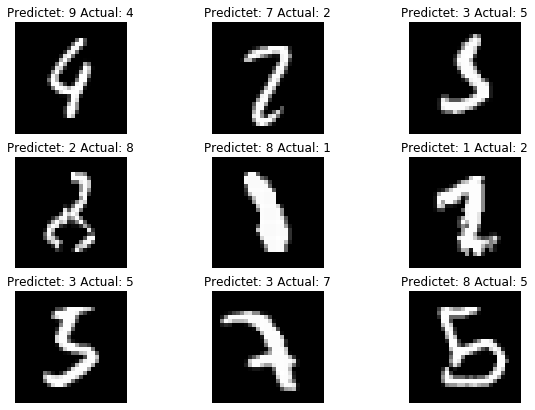

In [ ]:
# Let us look at some misclassified cases

ind_m=np.where(y_pred!=y_test)[0]
for t in range(9):
  plt.subplot(331+t)
  plt.imshow(x_test[ind_m[t]].reshape(28,28),cmap=plt.cm.gray)
  plt.title('Predictet: {} Actual: {}'.format(y_pred[ind_m[t]],y_test[ind_m[t]]))
  plt.axis('off')

plt.show()